In [1]:
import pandas as pd    #importing necessary libraries
import numpy as np

In [2]:
data = pd.read_csv('DataFrame.csv')      #Reading csv file and creating DataFrame
print(data.shape)
data.head()

(22805, 8)


,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [3]:
data.drop('Unnamed: 7' , axis = 1 , inplace = True)   #Dropping unnecessary Column:-> Unnamed: 7

In [4]:
data.rename(columns = str.upper , inplace = True)

In [5]:
data

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05


### CONVERTING STRING INTO DATE TIME SERIES

In [6]:
import datetime
data['DATE'] = pd.to_datetime(data['DATE'] , format = "%Y%m%d")

In [7]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


<AxesSubplot:>

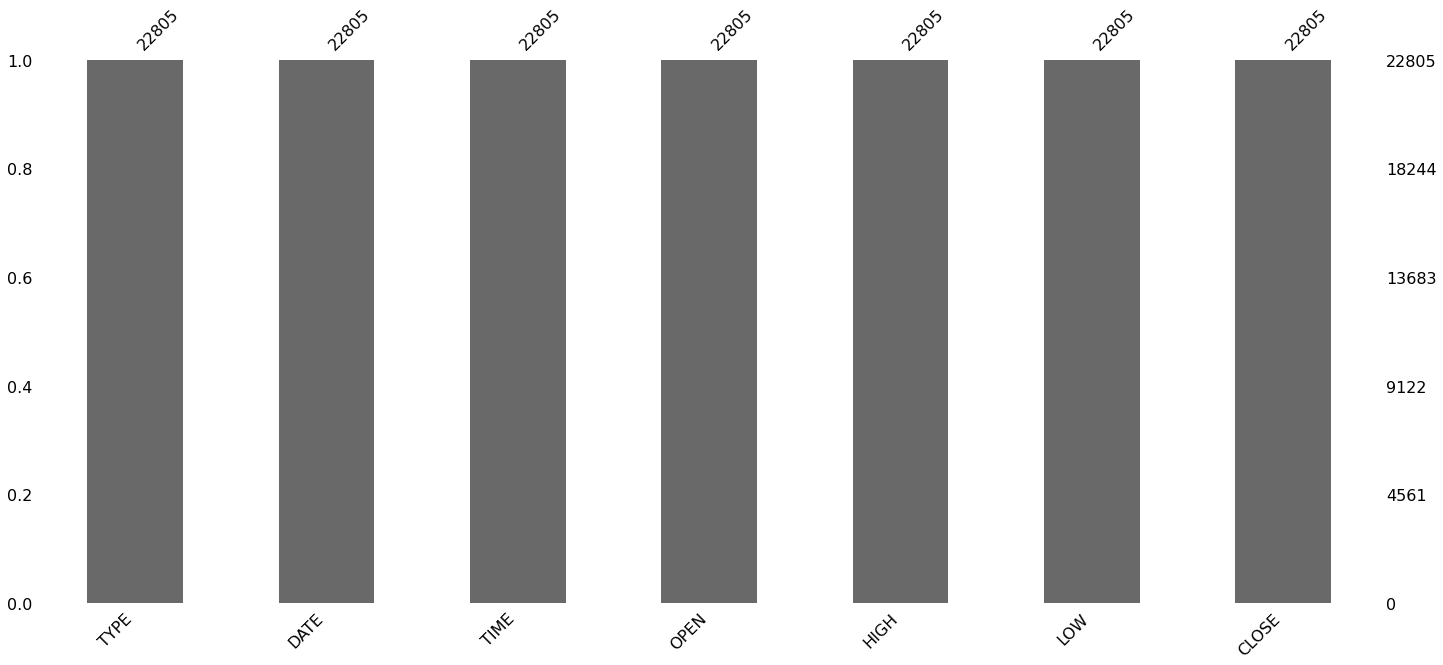

In [9]:
import missingno as msno       #Checking for the missing entries
msno.bar(data)

In [10]:
data.describe()   #Statistics of the Dataset

,OPEN,HIGH,LOW,CLOSE
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TYPE    22805 non-null  object        
 1   DATE    22805 non-null  datetime64[ns]
 2   TIME    22805 non-null  object        
 3   OPEN    22805 non-null  float64       
 4   HIGH    22805 non-null  float64       
 5   LOW     22805 non-null  float64       
 6   CLOSE   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.2+ MB


In [12]:
data[data.duplicated()]       #Checking for the duplicated entries

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE


#### CONSIDERING ANOTHER DATASET

In [6]:
df2 = pd.read_csv('MSFT.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [7]:
df2[df2.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [8]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [12]:
df2.isna().sum()rh-fzoh-tga

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [11]:
df2.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume    
2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001  19598900      1
1997-11-07  16.257812   16.500000   16.234375   16.445312   10.445252   63628800      1
1997-11-17  16.812500   16.976562   16.679688   16.859375   10.708243   60094400      1
1997-11-14  16.453125   16.734375   16.421875   16.664062   10.584191   46663200      1
1997-11-13  16.257812   16.453125   16.148438   16.445312   10.445252   60094400      1
                                                                                     ..
2009-08-17  23.320000   23.600000   23.230000   23.250000   17.886539   42474400      1
2009-08-18  23.290001   23.650000   23.270000   23.580000   18.242413   38878900      1
2009-08-19  23.250000   23.719999   23.250000   23.650000   18.296562   41821300      1
2009-08-20  23.600000   23.870001   23.540001   23.670000   18.312037   39505900      1
1986-03-13  0.088542    0.101563    0